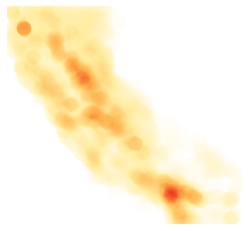

'density_rendered_gradient.png'

In [3]:
# We will create a new colormap that transitions from white (for zero values) to light orange and then to dark orange for the highest values.
# To create a layered effect, we will adjust the mapping function to increase the contrast between different intensity levels.

# Load the image
image_path = 'density_unrendered.png'
original_image = Image.open(image_path)

# Convert the image to a numpy array
image_array = np.array(original_image)

# Define the colors for the gradient
colors = ['#ffffff', '#ffeda0', '#feb24c', '#f03b20']  # White -> Light Orange -> Orange -> Dark Orange
n_bins = 256  # The number of color bins for the gradient, 256 for a smooth gradient
cmap_name = 'layered_gradient'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Find the maximum pixel value in the image array, ignoring zero values
max_value = image_array[image_array > 0].max()

# Create a non-linear mapping function to increase the contrast
def map_pixel_to_layered_color(value, max_value):
    if value == 0:
        return 0  # Map zero values to white
    else:
        # Map non-zero values to a power curve to enhance contrast between low and high intensity values
        return (value / max_value) ** (1 / 2.2)  # Adjust the exponent as needed

# Vectorize the function so it can be applied to the entire image array
vectorized_map = np.vectorize(map_pixel_to_layered_color)

# Map the pixel values to the [0, 1] range using the custom mapping function
mapped_image_array = vectorized_map(image_array, max_value=max_value)

# Apply the colormap to the mapped image array
colored_image = cm(mapped_image_array)

# Convert to RGB
colored_image_rgb = (colored_image[:, :, :3] * 255).astype(np.uint8)

# Create an image from the array
result_image = Image.fromarray(colored_image_rgb)

# Save the resulting image
output_path = 'density_rendered_gradient.png'
result_image.save(output_path)

# Display the resulting image
plt.imshow(result_image)
plt.axis('off')
plt.show()

output_path


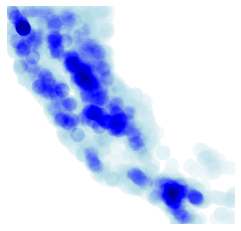

'density_years_rendered/density_gradient_2006.png'

In [8]:
# We will create a new colormap that transitions from white (for zero values) to light orange and then to dark orange for the highest values.
# To create a layered effect, we will adjust the mapping function to increase the contrast between different intensity levels.

# Load the image
image_path = 'density_years/density2006.png'
original_image = Image.open(image_path)

# Convert the image to a numpy array
image_array = np.array(original_image)

# Define the colors for the gradient
colors = ['#ffffff', '#add8e6', '#0000ff', '#00008b']  # White -> Light Blue -> Blue -> Dark Blue
n_bins = 256  # The number of color bins for the gradient, 256 for a smooth gradient
cmap_name = 'layered_gradient'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Find the maximum pixel value in the image array, ignoring zero values
max_value = image_array[image_array > 0].max()

# Create a non-linear mapping function to increase the contrast
def map_pixel_to_layered_color(value, max_value):
    if value == 0:
        return 0  # Map zero values to white
    else:
        # Map non-zero values to a power curve to enhance contrast between low and high intensity values
        return (value / max_value) ** (1 / 2.2)  # Adjust the exponent as needed

# Vectorize the function so it can be applied to the entire image array
vectorized_map = np.vectorize(map_pixel_to_layered_color)

# Map the pixel values to the [0, 1] range using the custom mapping function
mapped_image_array = vectorized_map(image_array, max_value=max_value)

# Apply the colormap to the mapped image array
colored_image = cm(mapped_image_array)

# Convert to RGB
colored_image_rgb = (colored_image[:, :, :3] * 255).astype(np.uint8)

# Create an image from the array
result_image = Image.fromarray(colored_image_rgb)

# Save the resulting image
output_path = 'density_years_rendered/density_gradient_2006.png'
result_image.save(output_path)

# Display the resulting image
plt.imshow(result_image)
plt.axis('off')
plt.show()

output_path


In [6]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def process_image_blue_gradient(image_path, output_path):
    # Load the image
    original_image = Image.open(image_path)

    # Convert the image to a numpy array
    image_array = np.array(original_image)

    # Define the colors for the gradient (blue gradient)
    colors = ['#ffffff', '#add8e6', '#0000ff', '#00008b']  # White -> Light Blue -> Blue -> Dark Blue
    n_bins = 256  # The number of color bins for the gradient
    cmap_name = 'blue_gradient'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    # Find the maximum pixel value in the image array, ignoring zero values
    max_value = image_array[image_array > 0].max()

    # Non-linear mapping function to increase the contrast
    def map_pixel_to_layered_color(value, max_value):
        if value == 0:
            return 0  # Map zero values to white
        else:
            return (value / max_value) ** (1 / 2.2)

    # Vectorize the function
    vectorized_map = np.vectorize(map_pixel_to_layered_color)

    # Map the pixel values
    mapped_image_array = vectorized_map(image_array, max_value=max_value)

    # Apply the colormap
    colored_image = cm(mapped_image_array)

    # Convert to RGB
    colored_image_rgb = (colored_image[:, :, :3] * 255).astype(np.uint8)

    # Create an image from the array
    result_image = Image.fromarray(colored_image_rgb)

    # Save the resulting image
    result_image.save(output_path)

def process_all_images_in_folder_blue(folder_path, output_folder_path):
    # Ensure output folder exists
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    # Process each image in the folder
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
            file_path = os.path.join(folder_path, filename)
            output_path = os.path.join(output_folder_path, 'processed_' + filename)
            process_image_blue_gradient(file_path, output_path)
            print(f'Processed {filename}')

# Example usage
input_folder = 'density_years'  # Replace with your input folder path
output_folder = 'density_years_rendered'  # Replace with your output folder path
process_all_images_in_folder_blue(input_folder, output_folder)


Processed density2008.png
Processed density2010.png
Processed density2005.png
Processed density2011.png
Processed density2007.png
Processed density2013.png
Processed density2012.png
Processed density2006.png
Processed density2015.png
Processed density2014.png
